# 神经网络基础

- 前馈神经网络、网络层数、输入层、隐藏层、输出层、隐藏单元、激活函数的概念。
- 感知机相关；定义简单的几层网络（激活函数sigmoid），递归使用链式法则来实现反向传播。
- 激活函数的种类以及各自的提出背景、优缺点。（和线性模型对比，线性模型的局限性，去线性化）
- 深度学习中的正则化（参数范数惩罚：L1正则化、L2正则化；数据集增强；噪声添加；early stop；Dropout层）、正则化的介绍。
- 深度模型中的优化：参数初始化策略；自适应学习率算法（梯度下降、AdaGrad、RMSProp、Adam；优化算法的选择）；batch norm层（提出背景、解决什么问题、层在训练和测试阶段的计算公式）；layer norm层。

## 深度前馈网络
深度前馈网络（deep feedforward network），也叫作前馈神经网络（feedforward neural network）或者多层感知机（multilayer perceptron，MLP）。

对深度前馈网络的理解，从感知机的角度可能更易。感知机又被成为最简单的神经网络，顾名思义，多层感知机就是在感知机的基础上设计添加了更多层。

前馈网络的目标是近似一个函数，意思是说对于目标函数，网络学习的最终目标是输出一个函数，并且尽可能接近。举个例子，一个二分类器会将输入映射到一个类别，前馈网络会定义一个新的映射，然后通过学习参数的值，使得新的映射能够得到最佳的函数映射。

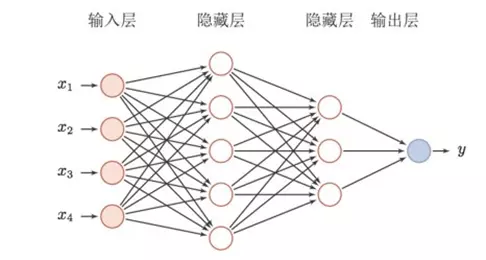
一个典型的前馈网络模型 


对于深度前馈网络，如图，由输入层、隐藏层、输出层和各层之间的连接组成，其中隐藏层根据模型的大小和复杂程度可以设计成数量任意的多层，各层之间的连接一般实际表示特征的权重。“深度”是指一个神经网络模型通常是由不止一层组成的，设计的层数越多，深度就越大，模型也越复杂。

对于前馈网络中的“前馈”，因为网络中的数据流向是单向的， 只会按照输入层-隐藏层-输出层的顺序流动，即数据流经当前一层处理后，只会作为下一层的输入流入，而不会对上一层有任何影响和反馈。如果当前层会对前面一层给出反馈或影响，这样的网络模型叫做循环神经网络。

神经网络之所以被成为“网络”，是因为我们可以认为这样的一个模型是由许多不同的函数复合在一起组成的，也就是说神经网络的每一层可以认为是一个函数，加上层与层之间的连接，就表示了多个函数复合在一起的过程。例如，对于一组输入，我们希望得到的输出是，现在有三个函数，那么经过的复合，就能产生近似的输出，其中每一个函数就可以认为是神经网络的一层。我们只关注模型的输入和输出，而对于具体的复合过程，也就是层与层之间的连接细节并不关注，因此将这层处理的层成为“隐藏层”。


## 感知机

深度前馈网络又叫多层感知机

感知机最大的局限是只能处理线性的样本空间，如图左，而对于线性不可分的数据无能为力。为了将线性不可分的样本空间变换到线性可分，从而可以利用线性函数近似，就引入了隐藏层，即通

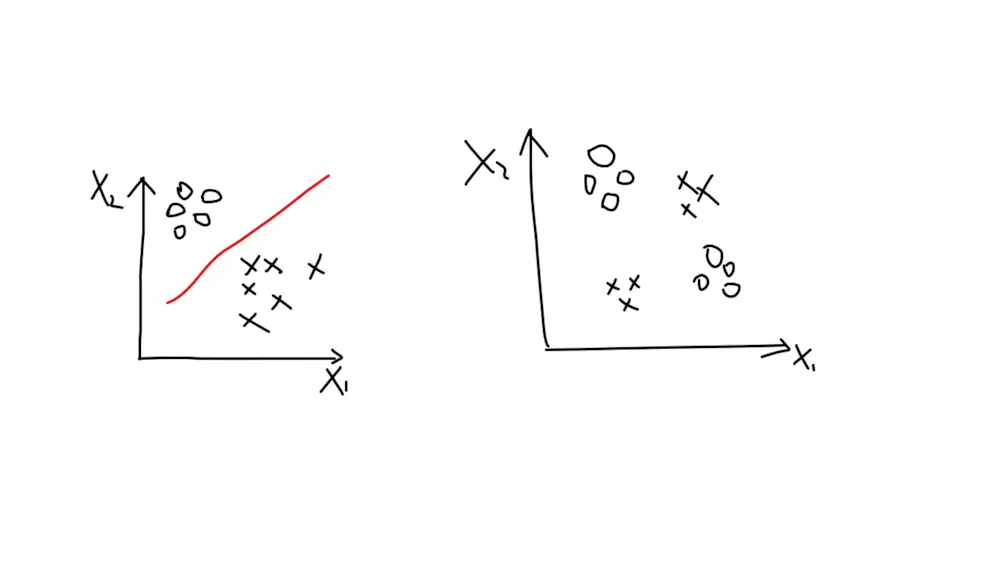

左：线性可分 右：线性不可分


## 激活函数

参考 https://blog.csdn.net/lwc5411117/article/details/83620184 学习

在神经网络中，我们会对所有的输入进行加权求和，之后我们会在对结果施加一个函数，这个函数就是我们所说的激活函数。如下图所示。

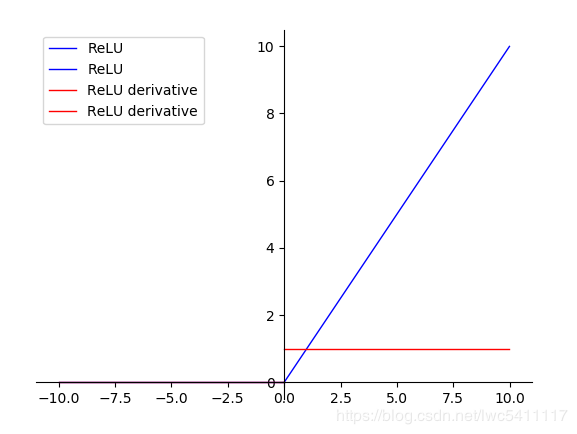

### 为什么使用激活函数

我们使用激活函数并不是真的激活什么，这只是一个抽象概念，使用激活函数时为了让中间输出多样化，能够处理更复杂的问题。

如果不适用结果函数的话，每一层最后输出的都是上一层输入的线性函数，不管加多少层神经网络，我们最后的输出也只是最开始输入数据的线性组合而已。激活函数给神经元引入了非线性因素，当加入多层神经网络时，就可以让神经网络拟合任何线性函数及非线性函数，从而使得神经网络可以适用于更多的非线性问题，而不仅仅是线性问题。

### 有哪些激活函数

对于神经网络，一般我们会使用三种激活函数：Sigmoid函数、Tanh函数、ReLU函数。

基本概念：

饱和：

当函数f(x)满足：$
\lim _{x \rightarrow+\infty} f^{\prime}(x)=0
$时，称为右饱和；

当函数f(x)满足：

$\lim _{x \rightarrow-\infty} f^{\prime}(x)=0
$时，称为左饱和。

当f(x)同事满足左饱和及右饱和时，称为饱和。

软包和与硬包和：

在饱和定义的基础上，如果存储常数c1，当x>c1时候恒满足，称之为右硬饱和；同样的，如果存在c2，
当x<c2时恒满足，称之为左硬饱和。如果同时满足了左饱和，又满足了右饱和，称之为硬包和。相对的，
只有在x趋于极值时才能满足f(x)的倒数为0，则成为软饱和。


- 1. Sigmoid 函数
sigmoid 曾经风靡一时，但是由于sigmoid有自身的缺陷，现在用的比较少了。

函数公式如下：

$f(x)=\frac{1}{1+e^{-x}}$，相应的$f^{'}(x)=f(x)(1-f(x))$

​​​​​​函数曲线如下：

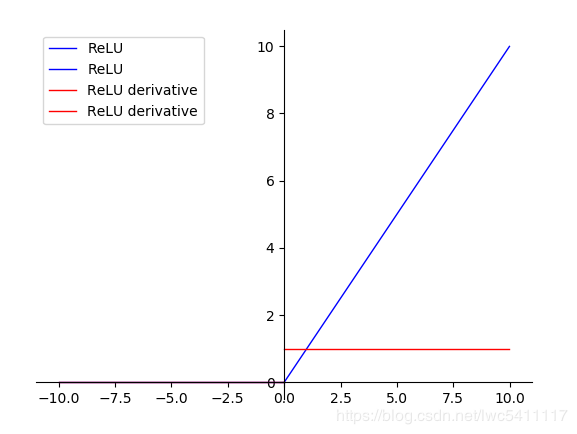


优点：

<1> Sigmoid的取值范围在(0, 1)，而且是单调递增，比较容易优化

<2> Sigmoid求导比较容易，可以直接推导得出。

缺点：

<1> Sigmoid函数收敛比较缓慢

<2> 由于Sigmoid是软饱和，容易产生梯度消失，对于深度网络训练不太适合（从图上sigmoid的导数可以看出当x趋于无穷大的时候，也会使导数趋于0）

<3> Sigmoid函数并不是以（0,0）为中心点


- 2. Tanh函数
tanh为双切正切曲线，过（0,0）点。相比Sigmoid函数，更倾向于用tanh函数

函数公式：

$f(x)=\frac{sinh(x)}{cosh(x)}=\frac{1-e^{-2x}}{1+e^{-2x}}=\frac{e^{x}-e^{-x}}{e^{x}+e^{-x}}=\frac{e^{2x}-1}{e^{2x}+1}=2sigmoid(2x)-1$

相应的$f^{'}(x)=tanh{'}(x)=sech^{2}(x)=1-tanh^{2}(x)$

函数曲线如下：

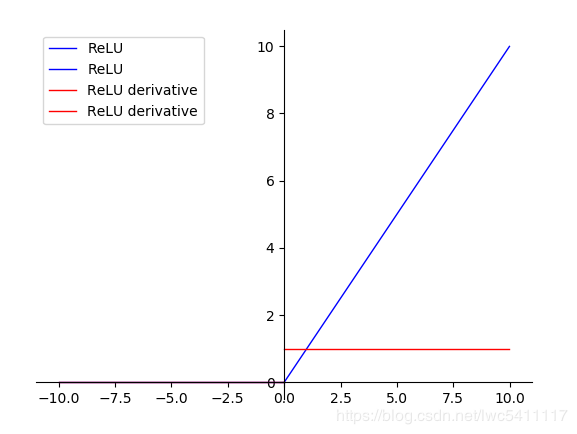

优点：

<1> 函数输出以（0,0）为中学

<2> 收敛速度相对于Sigmoid更快

缺点：

<1> tanh并没有解决sigmoid梯度消失的问题

- 3. ReLU函数
最近这几年很常用的激活函数。

公式如下：

$f(x)=max(0, x)=\left\{\begin{matrix} 0 & (x \leqslant 0)& \\ x & (x > 0) & \end{matrix}\right.$

图形图像：

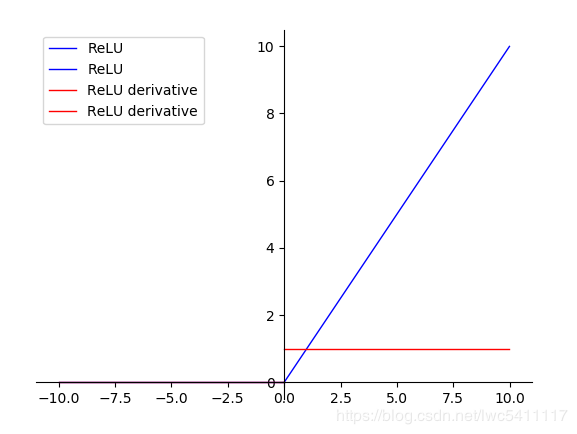

优点：

<1> 在SGD中收敛速度要比Sigmoid和tanh快很多

<2> 有效的缓解了梯度消失问题

<3> 对神经网络可以使用稀疏表达

<4> 对于无监督学习，也能获得很好的效果

缺点：

<1> 在训练过程中容易出现神经元失望，之后梯度永远为0的情况。比如一个特别大的梯度结果神经元之后，我们调整权重参数，就会造成这个ReLU神经元对后来来的输入永远都不会被激活，这个神经元的梯度永远都会是0，造成不可逆的死亡。\

## 正则化

参考学习 https://blog.csdn.net/u012554092/article/details/77987797

正则化定义为“对学习算法的修改——旨在减少泛化误差而不是训练误差”。

目前有许多正则化策略。 有些策略向机器学习模型添加限制参数值的额外约束。 有些策略向目标函数增加额外项来对参数值进行软约束。 有时侯，这些约束和惩罚被设计为编码特定类型的先验知识； 其他时候，这些约束和惩罚被设计为偏好简单模型，以便提高泛化能力。 有时，惩罚和约束对于确定欠定的问题是必要的。 其他形式的正则化，如被称为集成的方法，则结合多个假说来解释训练数据。


### 2.参数范数惩罚
在神经网络中，参数包括每一层仿射变换的权重和偏置，我们通常只对权重做惩罚而不对偏置做正则惩罚。 精确拟合偏置所需的数据通常比拟合权重少得多。 每个权重会指定两个变量如何相互作用。 我们需要在各种条件下观察这两个变量才能良好地拟合权重。 而每个偏置仅控制一个单变量。 这意味着，我们不对其进行正则化也不会导致太大的方差。 另外，正则化偏置参数可能会导致明显的欠拟合。

- 2.1 L2参数正则化
目标函数：

下总的目标函数

$$
\tilde{J}(w ; X, y)=\frac{\alpha}{2} w^{\top} w+J(w ; X, y)
$$

与之对应的梯度

$$
\nabla_{w} \tilde{J}(w ; X, y)=\alpha w+\nabla_{w} J(w ; X, y)
$$

使用单步梯度下降更新权重，更新方式

$$
w \leftarrow w-\epsilon\left(\alpha w+\nabla_{w} J(w ; X, y)\right)
$$

L2参数正则化效应示意图：

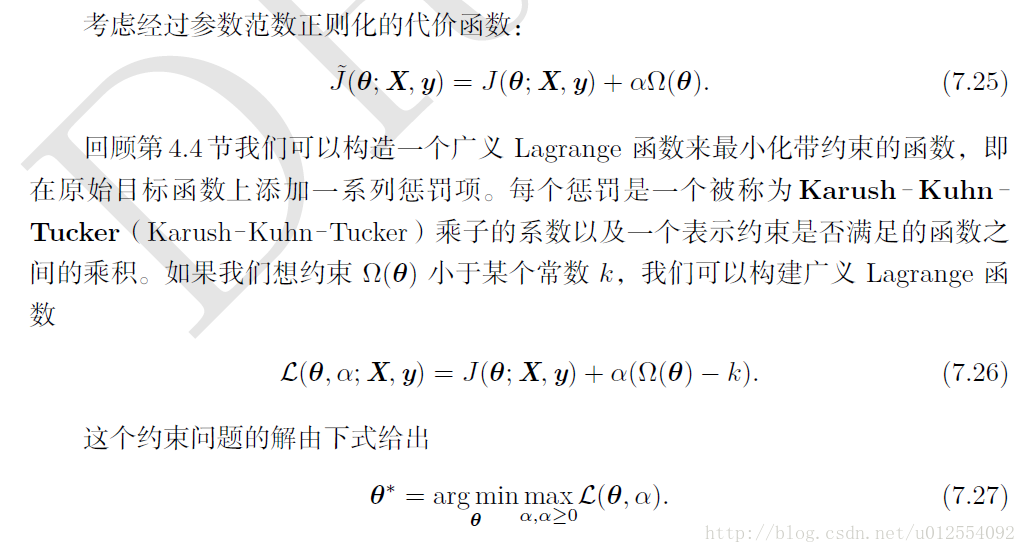


说明：只有在显著减小目标函数方向上的参数会保留得相对完好。 在无助于目标函数减小的方向上改变参数不会显著增加梯度。 这种不重要方向对应的分量会在训练过程中因正则化而衰减掉。

- 2.2 L1参数正则化

形式地，对模型参数ww的L1正则化被定义为：

$$
\Omega(\theta)=\|w\|_{1}=\sum_{i}\left|w_{i}\right|
$$


即各个参数的绝对值之和正则化。
相比L2正则化，L1正则化会产生更稀疏的解。 此处稀疏性指的是最优值中的一些参数为0。 L2正则化不会使参数变得稀疏，而L1正则化有可能通过足够大的αα实现稀疏。

由L1正则化导出的稀疏性质已经被广泛地用于特征选择机制。 特征选择从可用的特征子集选择出有意义的特征，化简机器学习问题。 著名的LASSO（Least Absolute Shrinkage and Selection Operator）模型将L1惩罚和线性模型结合，并使用最小二乘代价函数。 L1惩罚使部分子集的权重为零，表明相应的特征可以被安全地忽略。

## 3.作为约束的范数惩罚

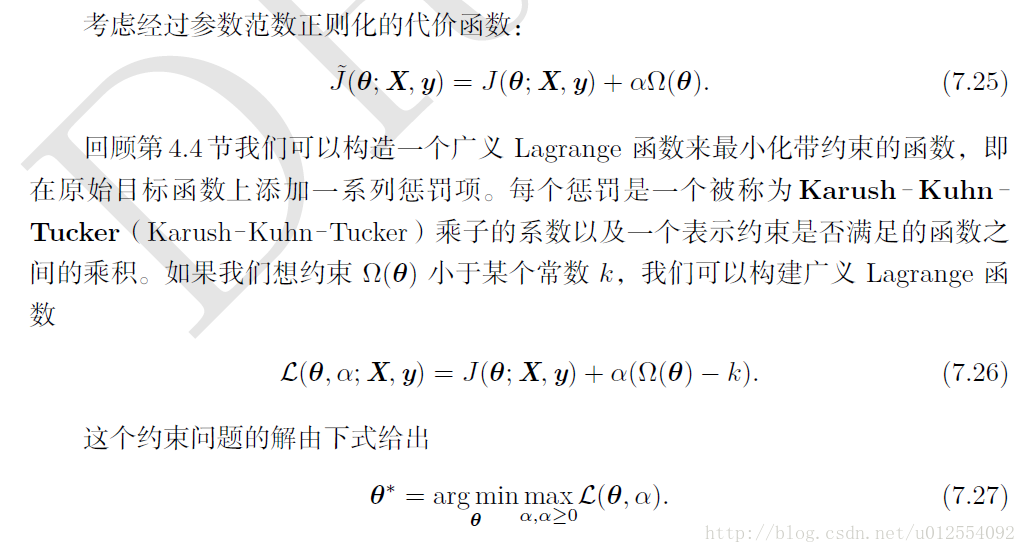

这和最小化J̃ J~的正则化训练问题是完全一样的。 因此，我们可以把参数范数惩罚看作对权重强加的约束。 如果Ω是L2范数，那么权重就是被约束在一个L2球中。 如果Ω是L1L1范数，那么权重就是被约束在一个L1范数限制的区域中。 通常我们不知道权重衰减系数α约束的区域大小，因为α的值不直接告诉我们kk的值。 原则上我们可以解得k，但k和α∗之间的关系取决于J的形式。 虽然我们不知道约束区域的确切大小，但我们可以通过增加或者减小α来大致扩大或收缩约束区域。 较大的α，将得到一个较小的约束区域。

有时候，我们希望使用显式的限制，而不是惩罚。 我们可以修改下降算法（如随机梯度下降算法），使其先计算J(θ)的下降步长，然后将θθ投影到满足Ω(θ)<k的最近点。 如果我们知道什么样的k是合适的，而不想花时间寻找对应于此k处的α值，这会非常有用。原因如下： 
a.惩罚可能会导致目标函数非凸而使算法陷入局部极小(对应于小的θ）。 

b.当使用较高的学习率时，很可能进入正反馈，即大的权重诱导大梯度，然后使得权重获得较大更新。 如果这些更新持续增加权重的大小，θθ就会迅速增大，直到离原点很远而发生溢出。 重投影的显式约束可以防止这种反馈环引起权重无限制地持续增加。 建议结合使用约束和高学习速率，这样能更快地探索参数空间，并保持一定的稳定性。

## 4.数据集增强
让机器学习模型泛化得更好的最好办法是使用更多的数据进行训练。 当然，在实践中，我们拥有的数据量是很有限的。 解决这个问题的一种方法是创建假数据并添加到训练集中。方式包括加入特定噪声（如高斯噪声），做一定的几何变换等等。

另一种正则化模型的噪声使用方式是将其加到权重，这项技术主要用于循环神经网络。 这可以被解释为关于权重的贝叶斯推断的随机实现。 贝叶斯学习过程将权重视为不确定的，并且可以通过概率分布表示这种不确定性。 向权重添加噪声是反映这种不确定性的一种实用的随机方法。

大多数数据集的y标签都有一定错误。 错误的y不利于最大化log⁡p(y∣x)。 避免这种情况的一种方法是显式地对标签上的噪声进行建模。 例如，我们可以假设，对于一些小常数ϵ，训练集标记y是正确的概率是1−ϵ，（以ϵ的概率）任何其他可能的标签也可能是正确的。 这个假设很容易就能解析地与代价函数结合，而不用显式地抽取噪声样本。 例如，标签平滑（label smoothing）通过把确切分类目标从0和1替换成ϵ/(k−1)和1−ϵ，正则化具有kk个输出的softmax函数的模型。 标准交叉熵损失可以用在这些非确切目标的输出上。 使用softmax函数和明确目标的最大似然学习可能永远不会收敛—— softmax函数永远无法真正预测0概率或1概率，因此它会继续学习越来越大的权重，使预测更极端。 使用如权重衰减等其他正则化策略能够防止这种情况。 标签平滑的优势是能够防止模型追求确切概率而不影响模型学习正确分类。


## 提前终止
当训练有足够的表示能力甚至会过拟合的大模型时，我们经常观察到，训练误差会随着时间的推移逐渐降低但验证集的误差会再次上升。

这意味着我们只要返回使验证集误差最低的参数设置，就可以获得验证集误差更低的模型（并且因此有希望获得更好的测试误差）。 在每次验证集误差有所改善后，我们存储模型参数的副本。 当训练算法终止时，我们返回这些参数而不是最新的参数。 当验证集上的误差在事先指定的循环次数内没有进一步改善时，算法就会终止。

## Dropout

Dropout通过随机行为训练网络并平均多个随机决定进行预测，实现了一种参数共享的Bagging形式。 
在训练中使用Dropout时，我们会使用基于小批量产生较小步长的学习算法，如随机梯度下降等。 我们每次在小批量中加载一个样本，然后随机抽样应用于网络中所有输入和隐藏单元的不同二值掩码。 对于每个单元，掩码是独立采样的。 掩码值为1的采样概率（导致包含一个单元）是训练开始前一个固定的超参数。 它不是模型当前参数值或输入样本的函数。 通常在每一个小批量训练的神经网络中，一个输入单元被包括的概率为0.8，一个隐藏单元被包括的概率为0.5。 然后，我们运行和之前一样的前向传播、反向传播以及学习更新。 
更正式地说，假设一个掩码向量u指定被包括的单元，J(θ,u)是由参数θ和掩码 u定义的模型代价。 那么Dropout训练的目标是最小化$$
E_{u} J(\theta, u)
$$。 这个期望包含多达指数级的项，但我们可以通过抽样mu获得梯度的无偏估计。

Dropout训练与Bagging训练不太一样。 在Bagging的情况下，所有模型都是独立的。 在Dropout的情况下，所有模型共享参数，其中每个模型继承父神经网络参数的不同子集。 参数共享使得在有限可用的内存下表示指数级数量的模型变得可能。 在Bagging的情况下，每一个模型在其相应训练集上训练到收敛。 在Dropout的情况下，通常大部分模型都没有显式地被训练，因为通常父神经网络会很大，以致于到宇宙毁灭都不可能采样完所有的子网络。 取而代之的是，在单个步骤中我们训练一小部分的子网络，参数共享会使得剩余的子网络也能有好的参数设定。 这些是仅有的区别。 除了这些，Dropout与Bagging算法一样。 例如，每个子网络中遇到的训练集确实是有放回采样的原始训练集的一个子集。

Bagging集成必须根据所有成员的累积投票做一个预测。 在这种背景下，我们将这个过程称为推断。 目前为止，我们在介绍Bagging和Dropout时没有要求模型具有明确的概率。 现在，我们假定该模型的作用是输出一个概率分布。 在Bagging的情况下，每个模型ii产生一个概率分布$p(i)(y∣x)p(i)(y∣x)$。 集成的预测由这些分布的算术平均值给出：

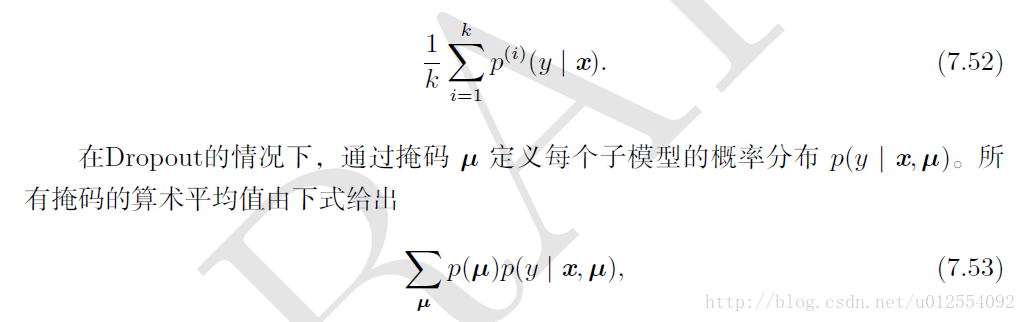

其中p(u)p(u)是训练时采样uu的概率分布。

虽然Dropout在特定模型上每一步的代价是微不足道的，但在一个完整的系统上使用Dropout的代价可能非常显著。 因为Dropout是一个正则化技术，它减少了模型的有效容量。 为了抵消这种影响，我们必须增大模型规模。 不出意外的话，使用Dropout时最佳验证集的误差会低很多，但这是以更大的模型和更多训练算法的迭代次数为代价换来的。 对于非常大的数据集，正则化带来的泛化误差减少得很小。 在这些情况下，使用Dropout和更大模型的计算代价可能超过正则化带来的好处。

## 深度模型中的优化

学习https://blog.csdn.net/justpsss/article/details/77680174 

### 随机梯度下降（SGD）


实践中，一般会线性衰减学习率直到第ττ次迭代：
$$
\epsilon_{k}=(1-\alpha) \epsilon_{0}+\alpha \epsilon_{\tau}
$$

其中，$$
\alpha=\frac{k}{\tau}
$$。在ττ布迭代之后，一般使ϵϵ保持常数。

### 动量（momentum）


如果动量算法总是观测到梯度gg，那么它会在方向−g−g上不停加速，直到达到最终速度，其中步长大小为：

ϵ||g||1−α
ϵ||g||1−α
因此，α=0.9α=0.9对应着最大速度10倍于梯度下降算法。

### Nesterov动量


Nesterov 动量中，梯度计算在施加当前速度之后。因此，Nesterov 动量可以解释为往标准动量方法中添加了一个校正因子。

在凸批量梯度下有改进，但是在随机梯度下没有改进收敛率。

### 参数初始化策略
- Gaussian initialization
- Xavier initialization
- He initialization
- Batch Normlization


### 自适应学习率算法
- AdaGrad


在凸优化背景下，AdaGrad算法具有一些令人满意的理论性质。

- RMSProp


RMSProp 算法(Hinton, 2012) 修改AdaGrad 以在非凸设定下效果更好，改变梯度积累为指数加权的移动平均。



- Adam


Adam通常被认为对超参数的选择相当鲁棒。